In [5]:
import numpy as np 
import datetime
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.dates as mdates
from pattern_prediction import *

plt.rc('text', usetex=True)

In [7]:
one_pred_index = np.arange(3600) /60
grids = [['Mallorca', 'Faroe Islands'], ['Iceland', 'Nordic']]
std_cmap = plt.get_cmap("viridis", 12)
test_col = std_cmap(3)
pred_col = std_cmap(10)
daily_col = std_cmap(1) 
fiftyHz_col = std_cmap(12)

# Introductory Figure and sketch of WNN method

In [6]:
data = pd.read_hdf('../Frequency_data_preparation/TransnetBW/cleansed_2012-02-01_to_2019-12-31.h5').loc['2012-02-01':'2019-08-31']
data_chunks = construct_chunks(data, 3600)
train_chunks = data_chunks.loc['2015-01-01 00:00:00':'2016-12-31 23:59:59']
test_chunks = data_chunks.loc['2017-01-01 00:00:00':'2017-12-31 23:59:59']

neighbor_finder = NearestNeighbors(3)

train_chunks = train_chunks[train_chunks.index.hour==train_chunks.index.hour[428]]
train_chunks = train_chunks[~train_chunks.isnull().any(axis=1)]
neighbor_finder.fit(train_chunks)
dists, nns = neighbor_finder.kneighbors(test_chunks.iloc[428].to_frame().T)

In [ ]:
plt.figure(figsize=(3,2))

i=428
i=np.argwhere(data.index==test_chunks.index[i])[0,0]
plt.plot(data.iloc[i:i+3600].index, data.iloc[i:i+3600], c=test_col, label='CE, '+test_chunks.index[428].strftime('%-dth %B %Y'))

plt.ylim([49.89,50.08])
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator, show_offset=False)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter) 
plt.grid(axis='x')
plt.ylabel('Frequency [Hz]', fontsize=11)
plt.xlabel('Time', fontsize=11)
plt.legend()

plt.savefig('./Pattern_prediction/paper_plots/transnetbw_example.pdf', bbox_inches='tight')

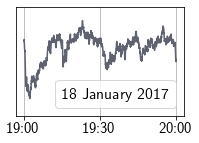

In [13]:
plt.figure(figsize=(3,2))

i=428
i=np.argwhere(data.index==test_chunks.index[i])[0,0]
plt.plot(data.iloc[i:i+3600].index, data.iloc[i:i+3600], c=test_col, label=test_chunks.index[428].strftime('%-d %B %Y'))

plt.ylim([49.89,50.08])
locator = mdates.AutoDateLocator(minticks=3, maxticks=4)
formatter = mdates.ConciseDateFormatter(locator, show_offset=False)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter) 
plt.grid(axis='x')
plt.tick_params(left=False, labelleft=False, labelsize=15)
plt.legend(handlelength=0, handletextpad=0,fontsize=16)

plt.savefig('./Pattern_prediction/paper_plots/transnetbw_example_simple.pdf', bbox_inches='tight')

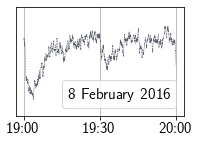

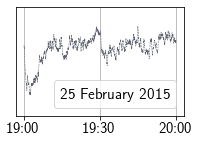

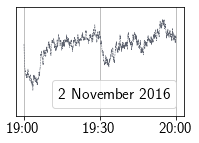

In [10]:
for j in range(3):
    fig=plt.figure(figsize=(3,2))   
    i=nns[0,j]
    i=np.argwhere(data.index==train_chunks.index[i])[0,0]

    plt.plot(data.iloc[i:i+3600].index, data.iloc[i:i+3600], '--',lw=0.5,c=test_col, label=data.index[i].strftime('%-d %B %Y'))
    plt.ylim([49.89,50.08])

    #plt.xticks([])
    #plt.ylabel('Frequency [Hz]', fontsize=11)
    #plt.xlabel('Time [Min]', fontsize=11)

    locator = mdates.AutoDateLocator(minticks=3, maxticks=4)
    formatter = mdates.ConciseDateFormatter(locator, show_offset=False)
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(formatter) 
    plt.tick_params(left=False, labelleft=False, labelsize=15)
    plt.grid(axis='x')
    plt.legend(handlelength=0, handletextpad=0,fontsize=15.5,loc='lower right')
    plt.title('')
    #plt.gca().xaxis.get_offset_text().set_fontsize(15)

    plt.savefig('./Pattern_prediction/paper_plots/transnetbw_nn{}.pdf'.format(j+1))

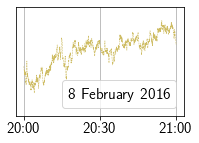

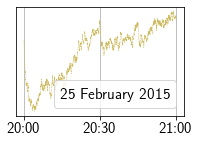

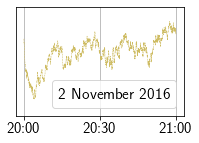

In [11]:
for j in range(3):
    fig=plt.figure(figsize=(3,2))
    i=nns[0,j]
    i=np.argwhere(data.index==train_chunks.index[i])[0,0]

    plt.plot(data.iloc[i+3600:i+2*3600].index, data.iloc[i+3600:i+2*3600], '--', lw=0.5, c=pred_col, label=data.index[i].strftime('%-d %B %Y'))
    plt.ylim([49.89,50.08])

    #plt.xticks([])
    #plt.ylabel('Frequency [Hz]', fontsize=11)
    #plt.xlabel('Time [Min]', fontsize=11)

    locator = mdates.AutoDateLocator(minticks=3, maxticks=4)
    formatter = mdates.ConciseDateFormatter(locator, show_offset=False)
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(formatter) 
    plt.tick_params(left=False, labelleft=False, labelsize=15)
    plt.grid(axis='x')
    plt.legend(handlelength=0, handletextpad=0,fontsize=15.5,loc='lower right')
    #plt.gca().xaxis.get_offset_text().set_fontsize(15)

    plt.savefig('./Pattern_prediction/paper_plots/transnetbw_nn{}_pred.pdf'.format(j+1))

In [ ]:
pred = nearest_neighbor_prediction(train_chunks, test_chunks.iloc[428].to_frame().T, 3600, 3600, 2, constant_weights=False)[0]
fig=plt.figure(figsize=(3,2))

i=428
i=np.argwhere(data.index==test_chunks.index[i])[0,0]

#plt.plot(data.iloc[i+3600:i+2*3600].index, data.iloc[i+3600:i+2*3600], '-', lw=0.5, c=test_col)
plt.plot(data.iloc[i+3600:i+2*3600].index, pred, c=pred_col)

plt.ylim([49.89,50.08])

#plt.xticks([])
#plt.ylabel('Frequency [Hz]', fontsize=11)
#plt.xlabel('Time [Min]', fontsize=11)

locator = mdates.AutoDateLocator(minticks=3, maxticks=4)
formatter = mdates.ConciseDateFormatter(locator, show_offset=False)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter) 
plt.tick_params(left=False, labelleft=False, labelsize=15)
plt.grid(axis='x')

plt.savefig('./Pattern_prediction/paper_plots/transnetbw_pred.pdf')

# Statistical properties of the power grids

In [3]:
ge_daily_profile = np.loadtxt('./Feature_preparation/Results/time_scales/GE_daily_profile.txt')
gb_daily_profile = np.loadtxt('./Feature_preparation/Results/time_scales/GB_daily_profile.txt')
fi_daily_profile = np.loadtxt('./Feature_preparation/Results/time_scales/FI_daily_profile.txt')

ge_acf = np.loadtxt('./Feature_preparation/Results/time_scales/GE_long_acf.txt')
gb_acf = np.loadtxt('./Feature_preparation/Results/time_scales/GB_long_acf.txt')
fi_acf = np.loadtxt('./Feature_preparation/Results/time_scales/FI_long_acf.txt')

ge_hourly_std = np.loadtxt('./Feature_preparation/Results/time_scales/GE_hourly_std_dev.txt')
gb_hourly_std = np.loadtxt('./Feature_preparation/Results/time_scales/GB_hourly_std_dev.txt')
fi_hourly_std = np.loadtxt('./Feature_preparation/Results/time_scales/FI_hourly_std_dev.txt')

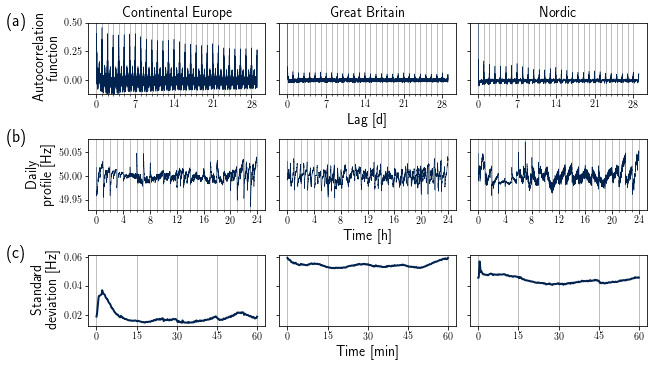

In [64]:
one_day_index = np.arange(3600*24)/(3600)
fig, axs = plt.subplots(3, 3, figsize=(9.,5.2), sharey='row')

axs[1,0].plot(one_day_index, ge_daily_profile, lw=0.5, c=daily_col)
axs[0,0].plot((np.arange(ge_acf.shape[0])/3600/24), ge_acf, lw=0.5, c=daily_col)
axs[0,0].set_ylim([-0.12,0.5])
axs[2,0].plot(one_pred_index, ge_hourly_std, lw=2, c=daily_col)

axs[1,1].plot(one_day_index, gb_daily_profile, lw=0.5, c=daily_col)
axs[0,1].plot((np.arange(gb_acf.shape[0])/3600/24), gb_acf, lw=0.5, c=daily_col)
axs[2,1].plot(one_pred_index, gb_hourly_std, lw=2, c=daily_col)

axs[1,2].plot(one_day_index, fi_daily_profile, lw=0.5, c=daily_col)
axs[0,2].plot((np.arange(fi_acf.shape[0])/3600/24), fi_acf, lw=0.5, c=daily_col)
axs[2,2].plot(one_pred_index, fi_hourly_std, lw=2, c=daily_col)

for i in range(3):
    axs[1,i].set_xticks(np.arange(24), minor=True)
    axs[1,i].set_xticks(np.arange(25)[::4], minor=False)
    axs[1,i].grid(axis='x', which='both')
    axs[2,i].set_xticks([0,15,30,45,60])
    axs[0,i].set_xticks(np.arange(29), minor=True)
    axs[0,i].set_xticks([0,7,14,21,28], minor=False)
    axs[2,i].grid(axis='x')
    axs[0,i].grid(axis='x', which='both')
    axs[0,i].set_title(grids[i], fontsize=14)
    axs[i,0].annotate(['(a)','(b)','(c)'][i], xy=(-0.46, 0.95), xycoords='axes fraction', fontsize=17)

axs[2,1].set_xlabel('Time [min]', fontsize=14)
axs[0,1].set_xlabel('Lag [d]', fontsize=14)
axs[1,1].set_xlabel('Time [h]', fontsize=14)
axs[1,0].set_ylabel('Daily \nprofile [Hz]', fontsize=14)
axs[0,0].set_ylabel('Autocorrelation \nfunction', fontsize=14)
axs[2,0].set_ylabel('Standard \ndeviation [Hz]', fontsize=14)


plt.tight_layout()
plt.savefig('./Pattern_prediction/paper_plots/fig2.pdf', bbox_inches='tight')

# Example plots of predictions

In [29]:
example_fi = np.load('./Pattern_prediction/Results/examples/FI_pred_example_start0_cweightsFalse_win_size3600.npz')
example_ge = np.load('./Pattern_prediction/Results/examples/GE_pred_example_start0_cweightsFalse_win_size3600.npz')
example_gb = np.load('./Pattern_prediction/Results/examples/GB_pred_example_start0_cweightsFalse_win_size3600.npz')

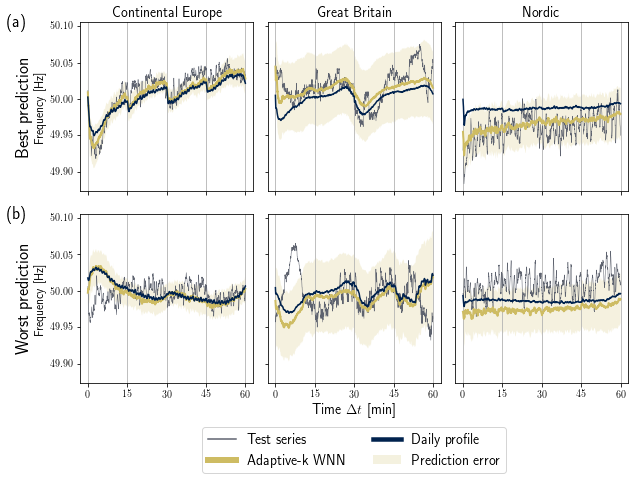

In [65]:
fig, axs = plt.subplots(2, 3, figsize=(8.8,6), sharey=True, sharex=True)

for i, example in enumerate([example_ge, example_gb, example_fi]):

    axs[0,i].fill_between(one_pred_index, example['best_pred'] + example['best_pred_std'],
                example['best_pred'] - example['best_pred_std'], alpha=0.2,facecolor=pred_col, label='Prediction error')
    axs[0,i].plot(one_pred_index, example['best_test'], c=test_col, label='Test series', lw=0.5)
    #axs[0,i].plot(one_pred_index, example['best_pred'], c='w', lw=2.8)
    axs[0,i].plot(one_pred_index, example['best_pred'], c=pred_col, label='Adaptive-k WNN', lw=2)
    axs[0,i].plot(one_pred_index, example['daily_profile_pred_best'],c=daily_col, label='Daily profile', lw=1.5)

    axs[1,i].fill_between(one_pred_index, example['worst_pred'] + example['worst_pred_std'],
                    example['worst_pred'] - example['worst_pred_std'], alpha=0.2,facecolor=pred_col)
    axs[1,i].plot(one_pred_index, example['worst_test'], c=test_col, lw=0.5)
    #axs[1,i].plot(one_pred_index, example['worst_pred'],c='w', lw=2.8)
    axs[1,i].plot(one_pred_index, example['worst_pred'],c=pred_col, lw=2)
    axs[1,i].plot(one_pred_index, example['daily_profile_pred_worst'], c=daily_col, lw=1.5)


for i in range(2):
    for j in range(3):
        axs[i,j].set_xticks([0,15,30,45,60])
        axs[i,j].grid(axis='x')
        axs[0,j].set_title(grids[j], fontsize=14)
    axs[i,0].annotate(['(a)','(b)'][i], xy=(-0.42, 0.97), xycoords='axes fraction', fontsize=17)

axs[1,1].set_xlabel('Time $\Delta t$ [min]', fontsize=14)
axs[0,0].set_ylabel('\LARGE{Best prediction} \n \large{Frequency [Hz]}', multialignment='center', fontsize=14)
axs[1,0].set_ylabel('\LARGE{Worst prediction} \n \large{Frequency [Hz]}', multialignment='center', fontsize=14)
plt.tight_layout()

leg=axs[0,0].legend(ncol=2, bbox_to_anchor=(2, -1.85, 0.5, 0.5), fontsize=14)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0*legobj.get_linewidth())

plt.savefig('./Pattern_prediction/paper_plots/fig4.pdf', bbox_inches='tight')

# Absolute performance of predictions 
Comparing fixed-k and adaptive-k

In [24]:
path_root = '/Users/thorbjornlundonsaker/workspace/Master/DATA/results/eval_prediction/'
perf_Mallorca = np.load(path_root + 'Mallorca/performance_start0_cweightsFalse_win_size3600_0weeks_2months.npz')
perf_Faroe_Islands = np.load(path_root + 'Faroe_Islands/performance_start0_cweightsFalse_win_size3600_1weeks_0months.npz')
perf_Iceland = np.load(path_root + 'Iceland/performance_start0_cweightsFalse_win_size3600_0weeks_2months.npz')
perf_Nordic = np.load(path_root + 'Nordic/performance_start0_cweightsFalse_win_size3600_0weeks_2months.npz')

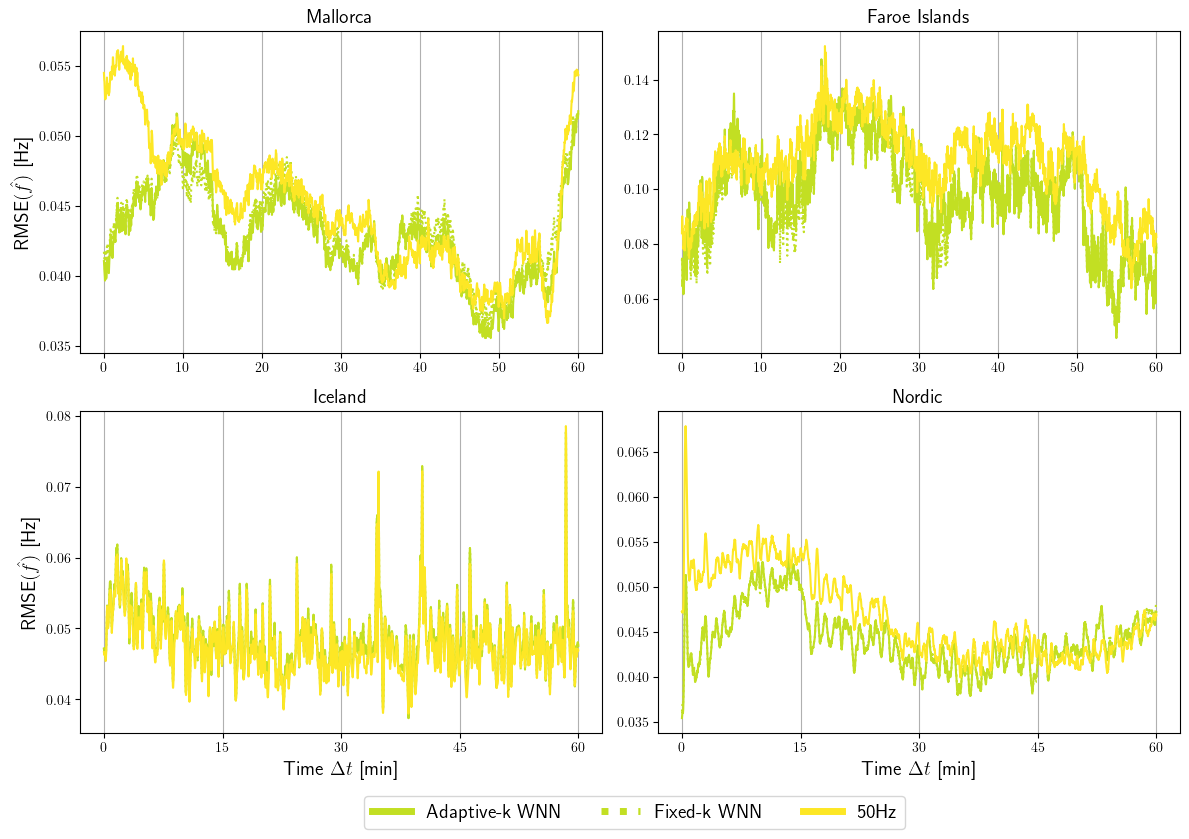

In [55]:
one_day_index = np.arange(3600*24)/(3600)
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex='row')
data = [[perf_Mallorca, perf_Faroe_Islands], [perf_Iceland, perf_Nordic]]

for i in range(2):
    for j in range(2):
        perf = data[i][j]
        axs[i, j].plot(one_pred_index, perf['pred_error_adaptive_k'] , c=pred_col, label='Adaptive-k WNN')
        axs[i, j].plot(one_pred_index, perf['pred_error_fixed_k'],':', c=pred_col, label='Fixed-k WNN')
        axs[i, j].plot(one_pred_index, perf['fiftyHz_error'] , c=fiftyHz_col, label='50Hz')
        #axs[i, j].plot(one_pred_index, perf['daily_profile_error'] , c=daily_col, label='Daily profile')

        #axs[1,i].plot(one_pred_index[:600], (perf['pred_error_adaptive_k']/perf['daily_profile_error'])[:600] , c=pred_col)
        #axs[1,i].plot(one_pred_index[:600], (perf['pred_error_fixed_k']/perf['daily_profile_error'])[:600], ':',lw=3, c=pred_col)
        #axs[1,i].plot(one_pred_index[:600], np.ones(600),'--',lw=2, c=daily_col)


for i in range(2):
    for j in range(2):
        if i == 1:
            axs[i, j].set_xticks([0,15,30,45,60])
            axs[i, j].set_xlabel('Time $\Delta t$ [min]', fontsize=14)
        if j == 0:
            axs[i, j].set_ylabel('RMSE$(\hat f)$ [Hz]', fontsize=14)
        axs[i, j].grid(axis='x')
        #axs[1,i].set_xticks([0,2,4,6,8,10])
        #axs[1,i].grid(axis='x')
        axs[i, j].set_title(grids[i][j], fontsize=14)
# axs[1].set_xlabel('Time $\Delta t$ [min]', fontsize=14)
# axs[0].set_ylabel('RMSE$(\hat f)$ [Hz]', fontsize=14)
#axs[1,0].set_ylabel(r'RMSE$(f_p)$ / RMSE$(f_d)$', fontsize=14)
plt.tight_layout()
leg=axs[0][0].legend(ncol=3,  bbox_to_anchor=(1.1, -1.85, 0.5, 0.5), fontsize=14)
for legobj in leg.legendHandles:
     legobj.set_linewidth(5.0)
plt.show()

# plt.savefig(path_root + 'plots/1_week.png', bbox_inches='tight')

In [ ]:
path_root = '/Users/thorbjornlundonsaker/workspace/Master/DATA/results/eval_prediction/'
perf_Mallorca = np.load(path_root + 'Mallorca/performance_start0_cweightsFalse_win_size3600_{}weeks_{}months.npz')
perf_Faroe_Islands = np.load(path_root + 'Faroe_Islands/performance_start0_cweightsFalse_win_size3600_{}weeks_{}months.npz')
perf_Iceland = np.load(path_root + 'Iceland/performance_start0_cweightsFalse_win_size3600_{}weeks_{}months.npz')
perf_Nordic = np.load(path_root + 'Nordic/performance_start0_cweightsFalse_win_size3600_{}weeks_{}months.npz')

mallorca = [(1, 0), (2, 0), (0, 1), (0, 2)]  # (0, 6) run half year against nordic?
iceland = [(1, 0), (2, 0), (0, 1), (0, 2)]
faroe_islands = [(1, 0)]
nordic = [(1, 0), (2, 0), (0, 1), (0, 2)]
areas = [[mallorca, iceland], [faroe_islands, nordic]

one_day_index = np.arange(3600*24)/(3600)
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex='row')
data = [[perf_Mallorca, perf_Faroe_Islands], [perf_Iceland, perf_Nordic]]


for i in range(2):
    for j in range(2):
        times = areas[i][j]
        for time in times:
            week, month = time
            label = '{} weeks'.format(week)
            if week == 1:
                label = '{} week'.format(week)
            if week == 0:
                if month == 1:
                    label = '{} month'.format(month)
                    label = '{} months'.format(month)
            perf = data[i][j].format(week, month)
            axs[i, j].plot(one_pred_index, perf['pred_error_adaptive_k'] , c=pred_col, label=label)
            # axs[i, j].plot(one_pred_index, perf['pred_error_fixed_k'],':', c=pred_col, label='Fixed-k WNN')
            # axs[i, j].plot(one_pred_index, perf['fiftyHz_error'] , c=fiftyHz_col, label='50Hz')
            # axs[i, j].plot(one_pred_index, perf['daily_profile_error'] , c=daily_col, label='Daily profile')

        #axs[1,i].plot(one_pred_index[:600], (perf['pred_error_adaptive_k']/perf['daily_profile_error'])[:600] , c=pred_col)
        #axs[1,i].plot(one_pred_index[:600], (perf['pred_error_fixed_k']/perf['daily_profile_error'])[:600], ':',lw=3, c=pred_col)
        #axs[1,i].plot(one_pred_index[:600], np.ones(600),'--',lw=2, c=daily_col)


for i in range(2):
    for j in range(2):
        if i == 1:
            axs[i, j].set_xticks([0,15,30,45,60])
            axs[i, j].set_xlabel('Time $\Delta t$ [min]', fontsize=14)
        if j == 0:
            axs[i, j].set_ylabel('RMSE$(\hat f)$ [Hz]', fontsize=14)
        axs[i, j].grid(axis='x')
        #axs[1,i].set_xticks([0,2,4,6,8,10])
        #axs[1,i].grid(axis='x')
        axs[i, j].set_title(grids[i][j], fontsize=14)
# axs[1].set_xlabel('Time $\Delta t$ [min]', fontsize=14)
# axs[0].set_ylabel('RMSE$(\hat f)$ [Hz]', fontsize=14)
#axs[1,0].set_ylabel(r'RMSE$(f_p)$ / RMSE$(f_d)$', fontsize=14)
plt.tight_layout()
leg=axs[0][0].legend(ncol=3,  bbox_to_anchor=(1.1, -1.85, 0.5, 0.5), fontsize=14)
for legobj in leg.legendHandles:
     legobj.set_linewidth(5.0)
plt.show()

# plt.savefig(path_root + 'plots/1_week.png', bbox_inches='tight')

# Number of nearest neighbors optimization

In [3]:
mse_ge = np.load('./Pattern_prediction/Results/optimization/TransnetBW/mse_start0_cweightsFalse_win_size3600_ntests5000.npz')['mse_t']
knn_ge = np.load('./Pattern_prediction/Results/optimization/TransnetBW/k_opt_start0_cweightsFalse_win_size3600_ntests5000.npz')

mse_gb = np.load('./Pattern_prediction/Results/optimization/Nationalgrid/mse_start0_cweightsFalse_win_size3600_ntests5000.npz')['mse_t']
knn_gb = np.load('./Pattern_prediction/Results/optimization/Nationalgrid/k_opt_start0_cweightsFalse_win_size3600_ntests5000.npz')

mse_fi = np.load('./Pattern_prediction/Results/optimization/Fingrid/mse_start0_cweightsFalse_win_size3600_ntests5000.npz')['mse_t']
knn_fi = np.load('./Pattern_prediction/Results/optimization/Fingrid/k_opt_start0_cweightsFalse_win_size3600_ntests5000.npz')

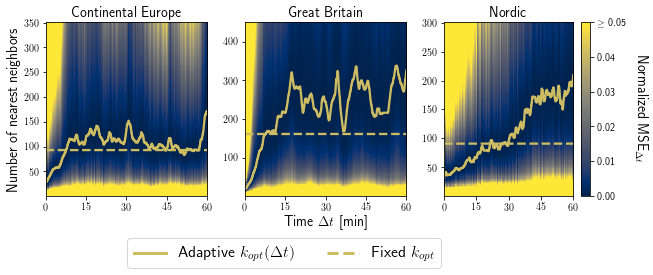

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(9.2,3.4))

for i, (mse,knn) in enumerate([(mse_ge, knn_ge),(mse_gb, knn_gb),(mse_fi, knn_fi) ]):

    k_nearest_neighbors = knn['k_nearest_neighbors']
    k_opt = knn['k_opt']
    k_opt_fixed = knn['k_opt_fixed']

    im=axs[i].imshow((mse-mse.min(axis=0))/(mse-mse.min(axis=0)).max(axis=0),
              origin='lower', extent=[one_pred_index[0], one_pred_index[-1], k_nearest_neighbors[0], k_nearest_neighbors[-1]],
              vmax=0.05, aspect='auto', cmap='cividis')


    axs[i].plot(one_pred_index, k_opt, c=pred_col, lw=2.3, label='Adaptive $k_{opt}(\Delta t)$')
    axs[i].plot(one_pred_index, np.ones(3600)*k_opt_fixed,'--', lw=2.3, c=pred_col, label='Fixed $k_{opt}$')


for i in range(3):
        axs[i].set_xticks([0,15,30,45,60])
        axs[i].set_title(grids[i], fontsize=14)

cbar=plt.colorbar(im)
cbar.ax.set_ylabel('Normalized MSE$_{\Delta t}$', rotation=270, labelpad=20, fontsize=14)
cbar.ax.set_yticklabels(['0.00', '0.01', '0.02', '0.03', '0.04', r'$\ge$ 0.05'])
axs[1].set_xlabel('Time $\Delta t$ [min]', fontsize=14)
axs[0].set_ylabel('Number of nearest neighbors', fontsize=14)

plt.tight_layout()

leg=axs[0].legend(ncol=2,  bbox_to_anchor=(2, -0.7, 0.5, 0.5), fontsize=16)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

plt.savefig('./Pattern_prediction/paper_plots/fig6.pdf', bbox_inches='tight')

# Impact of different start times

In [46]:
kopt0_ge = np.load('./Pattern_prediction/Results/optimization/TransnetBW/k_opt_start0_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf0_ge = np.load('./Pattern_prediction/Results/eval_prediction/TransnetBW/performance_start0_cweightsFalse_win_size3600_ntests5000.npz')
kopt15_ge = np.load('./Pattern_prediction/Results/optimization/TransnetBW/k_opt_start20_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf15_ge = np.load('./Pattern_prediction/Results/eval_prediction/TransnetBW/performance_start20_cweightsFalse_win_size3600_ntests5000.npz')
kopt30_ge = np.load('./Pattern_prediction/Results/optimization/TransnetBW/k_opt_start30_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf30_ge = np.load('./Pattern_prediction/Results/eval_prediction/TransnetBW/performance_start30_cweightsFalse_win_size3600_ntests5000.npz')
kopt55_ge = np.load('./Pattern_prediction/Results/optimization/TransnetBW/k_opt_start55_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf55_ge = np.load('./Pattern_prediction/Results/eval_prediction/TransnetBW/performance_start55_cweightsFalse_win_size3600_ntests5000.npz')

kopt0_gb = np.load('./Pattern_prediction/Results/optimization/Nationalgrid/k_opt_start0_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf0_gb = np.load('./Pattern_prediction/Results/eval_prediction/Nationalgrid/performance_start0_cweightsFalse_win_size3600_ntests5000.npz')
kopt15_gb = np.load('./Pattern_prediction/Results/optimization/Nationalgrid/k_opt_start20_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf15_gb = np.load('./Pattern_prediction/Results/eval_prediction/Nationalgrid/performance_start20_cweightsFalse_win_size3600_ntests5000.npz')
kopt30_gb = np.load('./Pattern_prediction/Results/optimization/Nationalgrid/k_opt_start30_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf30_gb = np.load('./Pattern_prediction/Results/eval_prediction/Nationalgrid/performance_start30_cweightsFalse_win_size3600_ntests5000.npz')
kopt55_gb = np.load('./Pattern_prediction/Results/optimization/Nationalgrid/k_opt_start55_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf55_gb = np.load('./Pattern_prediction/Results/eval_prediction/Nationalgrid/performance_start55_cweightsFalse_win_size3600_ntests5000.npz')

kopt0_fi = np.load('./Pattern_prediction/Results/optimization/Fingrid/k_opt_start0_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf0_fi = np.load('./Pattern_prediction/Results/eval_prediction/Fingrid/performance_start0_cweightsFalse_win_size3600_ntests5000.npz')
kopt15_fi = np.load('./Pattern_prediction/Results/optimization/Fingrid/k_opt_start20_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf15_fi = np.load('./Pattern_prediction/Results/eval_prediction/Fingrid/performance_start20_cweightsFalse_win_size3600_ntests5000.npz')
kopt30_fi = np.load('./Pattern_prediction/Results/optimization/Fingrid/k_opt_start30_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf30_fi = np.load('./Pattern_prediction/Results/eval_prediction/Fingrid/performance_start30_cweightsFalse_win_size3600_ntests5000.npz')
kopt55_fi = np.load('./Pattern_prediction/Results/optimization/Fingrid/k_opt_start55_cweightsFalse_win_size3600_ntests5000.npz')['k_opt']
perf55_fi = np.load('./Pattern_prediction/Results/eval_prediction/Fingrid/performance_start55_cweightsFalse_win_size3600_ntests5000.npz')

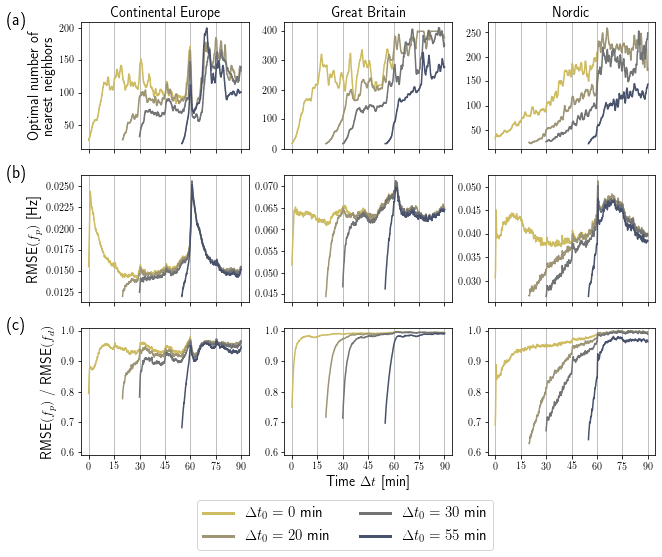

In [71]:
fig, axs = plt.subplots(3, 3, figsize=(9.2,7), sharex=True)

for i, (kopt0, perf0, kopt15, perf15, kopt30, perf30, kopt55, perf55) in enumerate([(kopt0_ge, perf0_ge, kopt15_ge, perf15_ge,
                                                                                     kopt30_ge, perf30_ge, kopt55_ge, perf55_ge),
                                                                                    (kopt0_gb, perf0_gb, kopt15_gb, perf15_gb,
                                                                                     kopt30_gb, perf30_gb, kopt55_gb, perf55_gb),
                                                                                    (kopt0_fi, perf0_fi, kopt15_fi, perf15_fi,
                                                                                     kopt30_fi, perf30_fi, kopt55_fi, perf55_fi)]):

    perf0_rel = perf0['pred_error_adaptive_k']/perf0['daily_profile_error']
    perf15_rel = perf15['pred_error_adaptive_k']/perf15['daily_profile_error']
    perf30_rel = perf30['pred_error_adaptive_k']/perf30['daily_profile_error']
    perf55_rel = perf55['pred_error_adaptive_k']/perf55['daily_profile_error']


    perf0 = perf0['pred_error_adaptive_k']
    perf15 = perf15['pred_error_adaptive_k']
    perf30 = perf30['pred_error_adaptive_k']
    perf55 = perf55['pred_error_adaptive_k']


    axs[0,i].plot(one_pred_index, kopt0, c=pred_col, label=r'$\Delta t_0=0$ min')
    axs[0,i].plot(np.arange(4200)/60 + 20, kopt15, c=std_cmap(7), label=r'$\Delta t_0=20$ min')
    axs[0,i].plot(one_pred_index+30, kopt30, c=std_cmap(5), label=r'$\Delta t_0=30$ min')  
    axs[0,i].plot(one_pred_index[:2100]+55, kopt55, c=std_cmap(3), label=r'$\Delta t_0=55$ min')    
  

    axs[1,i].plot(one_pred_index, perf0, c=pred_col)
    axs[1,i].plot(np.arange(4200)/60 + 20, perf15, c=std_cmap(7))
    axs[1,i].plot(one_pred_index+30, perf30, c=std_cmap(5))
    axs[1,i].plot(one_pred_index[:2100]+55, perf55, c=std_cmap(3))

    axs[2,i].plot(one_pred_index, perf0_rel, c=pred_col)
    axs[2,i].plot(np.arange(4200)/60 + 20, perf15_rel, c=std_cmap(7))
    axs[2,i].plot(one_pred_index+30, perf30_rel, c=std_cmap(5))
    axs[2,i].plot(one_pred_index[:2100]+55, perf55_rel, c=std_cmap(3))
    axs[2,i].set_ylim([0.59,1.01])

for i in range(3):
    for j in range(3):
        axs[i,j].set_xticks(np.array([0,15,30,45,60,75,90]))
        axs[i,j].grid(axis='x')
        axs[0,j].set_title(grids[j], fontsize=14)
    axs[i,0].annotate(['(a)','(b)','(c)'][i], xy=(-0.44, 0.98), xycoords='axes fraction', fontsize=17)


axs[2,1].set_xlabel('Time $\Delta t$ [min]', fontsize=14)
axs[0,0].set_ylabel('Optimal number of \nnearest neighbors', fontsize=14)
axs[1,0].set_ylabel(r'RMSE$(f_p)$ [Hz]', fontsize=14)
axs[2,0].set_ylabel('RMSE$(f_p)$ / RMSE$(f_d)$', fontsize=14)
plt.tight_layout()

leg=axs[0,0].legend(ncol=2,  bbox_to_anchor=(2., -3.2, 0.5, 0.5), fontsize=15)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

plt.savefig('./Pattern_prediction/paper_plots/fig7.pdf', bbox_inches='tight')

# Impact of different window sizes

In [5]:
perf900_ge = np.load('./Pattern_prediction/Results/eval_prediction/TransnetBW/performance_start0_cweightsFalse_win_size900_ntests5000.npz')
perf1800_ge = np.load('./Pattern_prediction/Results/eval_prediction/TransnetBW/performance_start0_cweightsFalse_win_size1800_ntests5000.npz')
perf3600_ge = np.load('./Pattern_prediction/Results/eval_prediction/TransnetBW/performance_start0_cweightsFalse_win_size3600_ntests5000.npz')


perf900_gb = np.load('./Pattern_prediction/Results/eval_prediction/Nationalgrid/performance_start0_cweightsFalse_win_size900_ntests5000.npz')
perf1800_gb = np.load('./Pattern_prediction/Results/eval_prediction/Nationalgrid/performance_start0_cweightsFalse_win_size1800_ntests5000.npz')
perf3600_gb = np.load('./Pattern_prediction/Results/eval_prediction/Nationalgrid/performance_start0_cweightsFalse_win_size3600_ntests5000.npz')


perf900_fi = np.load('./Pattern_prediction/Results/eval_prediction/Fingrid/performance_start0_cweightsFalse_win_size900_ntests5000.npz')
perf1800_fi = np.load('./Pattern_prediction/Results/eval_prediction/Fingrid/performance_start0_cweightsFalse_win_size1800_ntests5000.npz')
perf3600_fi = np.load('./Pattern_prediction/Results/eval_prediction/Fingrid/performance_start0_cweightsFalse_win_size3600_ntests5000.npz')

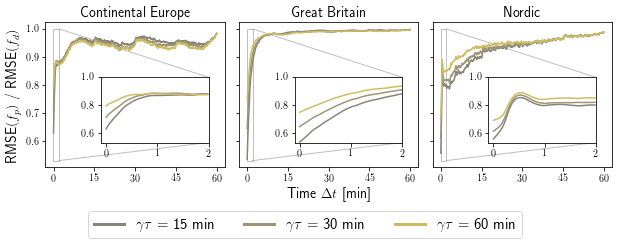

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(8.7,3), sharey=True)

for i, (perf900,perf1800,perf3600) in enumerate([(perf900_ge,perf1800_ge,perf3600_ge),
                                                 (perf900_gb,perf1800_gb,perf3600_gb),
                                                 (perf900_fi,perf1800_fi,perf3600_fi) ]):

    
        l1,=axs[i].plot(one_pred_index, (perf900['pred_error_adaptive_k']/perf900['daily_profile_error']), c=std_cmap(6))
        l2,=axs[i].plot(one_pred_index, (perf1800['pred_error_adaptive_k']/perf1800['daily_profile_error']),  c=std_cmap(7))
        l3,=axs[i].plot(one_pred_index, (perf3600['pred_error_adaptive_k']/perf3600['daily_profile_error']),  c=pred_col)

        axins = axs[i].inset_axes([0.31, 0.17, 0.6, 0.45])
        x1, x2, y1, y2 = -0.1,2,0.53,1
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.plot(one_pred_index[:120], (perf900['pred_error_adaptive_k']/perf900['daily_profile_error'])[:120], c=std_cmap(6))
        axins.plot(one_pred_index[:120], (perf1800['pred_error_adaptive_k']/perf1800['daily_profile_error'])[:120],  c=std_cmap(7))
        axins.plot(one_pred_index[:120], (perf3600['pred_error_adaptive_k']/perf3600['daily_profile_error'])[:120],  c=pred_col)
        axs[i].indicate_inset_zoom(axins, linewidth=1, zorder=-1)

for i in range(3):
        axs[i].set_xticks([0,15,30,45,60])
        #axs[i].grid(axis='x')
        axs[i].set_title(grids[i], fontsize=14)


axs[1].set_xlabel('Time $\Delta t$ [min]', fontsize=14)
axs[0].set_ylabel(r'RMSE$(f_p)$ / RMSE$(f_d)$', fontsize=14)

plt.tight_layout()
leg=axs[0].legend([l1,l2,l3], [r'$\gamma\tau=$ 15 min',r'$\gamma\tau=$ 30 min',r'$\gamma\tau=$ 60 min'], ncol=3, bbox_to_anchor=(2.2, -0.75, 0.5, 0.5),  fontsize=15)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)

plt.savefig('./Pattern_prediction/paper_plots/fig8.pdf', bbox_inches='tight')